<a href="https://colab.research.google.com/github/HectorValero1983/Inteligencia_Artificial/blob/main/Actividad_3_Unidad_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importamos librerias
import matplotlib.pyplot as plt
import networkx as nx


In [4]:
#Utilizamos la estructura de datos con la clase Graph y creamos la variable de vertices y variable graph
def print_graph(graph):
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw(graph, with_labels=True, font_weight='bold')
    nx.draw_networkx_edge_labels(graph, pos=nx.spring_layout(graph), edge_labels=edge_labels)
    plt.show()

vertices = ['A', 'B', 'C', 'D', 'E']
graph = nx.Graph()

In [5]:
# Agragamos los pesos en la variable de los vertices
graph.add_weighted_edges_from([('PORTAL SUBA', 'NIZA_127', 10),
                               ('PORTAL SUBA', 'SHAIO', 15),
                               ('NIZA_127', 'SHAIO', 5),
                               ('NIZA_127', 'QUIRIGUA', 20),
                               ('SHAIO', 'QUIRIGUA', 30),
                               ('SHAIO', 'PORTAL 80', 10),
                               ('QUIRIGUA', 'PORTAL 80', 15)])

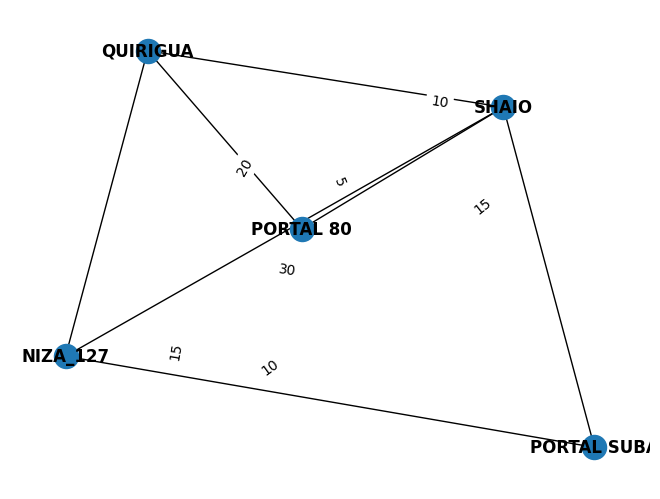

In [6]:
#Imprimimos el grafico donde encontramos las distancias entre estaciones
print_graph(graph)

In [8]:
#Definimos las variables que va a ingresar el usuario y por medio del algoritmo dijkstra se utiliza para calcular la distancia mas corta
#considerando los pesos de cada vertice como base

Inicio_Ruta = input("Digite la Estación de Inicio: ")
Destino_Ruta = input("Digite la Estación de Destino: ")


Ruta_Optima = nx.dijkstra_path(graph, source=Inicio_Ruta, target=Destino_Ruta)
Distancia_Ruta_Optima = nx.dijkstra_path_length(graph, source=Inicio_Ruta, target=Destino_Ruta)

print (f"La mejor ruta entre la estación de Inicio {Inicio_Ruta} y la estación de Destino {Destino_Ruta} es:");
print (Ruta_Optima);
print ("y la distancia recorrida entre estas estaciones es de ");
print (f"{Distancia_Ruta_Optima} Kms");


Digite la Estación de Inicio: PORTAL SUBA
Digite la Estación de Destino: PORTAL 80
La mejor ruta entre la estación de Inicio PORTAL SUBA y la estación de Destino PORTAL 80 es:
['PORTAL SUBA', 'SHAIO', 'PORTAL 80']
y la distancia recorrida entre estas estaciones es de 
25 Kms


In [10]:
import pandas as pd
import numpy as np

In [11]:
# Creamos un DataFrame con los datos de las estaciones y la distancia recorrida
data = {'Inicio_Ruta': Ruta_Optima,
        'Destino_Ruta': Destino_Ruta,
        'Distancia_Ruta_Optima': Distancia_Ruta_Optima}
df = pd.DataFrame(data)

In [12]:
# Codificamos las estaciones de inicio y destino como variables numéricas
df['Inicio_Ruta'] = df['Inicio_Ruta'].astype('category').cat.codes
df['Destino_Ruta'] = df['Destino_Ruta'].astype('category').cat.codes

In [19]:
# Dividimos los datos en un conjunto de entrenamiento y un conjunto de prueba
from sklearn.model_selection import train_test_split

X = df[['Inicio_Ruta', 'Distancia_Ruta_Optima']]
y = df['Destino_Ruta']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=60)

In [25]:
# Entrenamos un modelo de clasificación utilizando el algoritmo de vecinos más cercanos (KNN)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [28]:
# Predecimos la estación de destino utilizando el modelo entrenado
y_pred = knn.predict(X_test)
# Evaluamos la precisión del modelo
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

Precisión del modelo: 1.0


In [168]:
import random

In [183]:
# Asigna un número entero a cada estación
estacion_a_numero = {'PORTAL SUBA': 0, 'NIZA_127': 1, 'SHAIO': 2, 'QUIRIGUA': 3, 'PORTAL 80': 4}

# Crea una lista de tuplas con las estaciones y sus atributos
estaciones = [(0, 1, 10),
              (0, 2, 15),
              (1, 2, 5),
              (1, 3, 20),
              (2, 3, 30),
              (2, 4, 10),
              (3, 4, 15)]

In [184]:
print(estaciones)

[(0, 1, 10), (0, 2, 15), (1, 2, 5), (1, 3, 20), (2, 3, 30), (2, 4, 10), (3, 4, 15)]


In [185]:
# Asegúrate de que todas las tuplas en la lista de estaciones tengan exactamente dos valores
for estacion in estaciones:
    if len(estacion) != 3:
        print(f"La tupla {estacion} no tiene exactamente dos valores")
        exit()

In [186]:
# Divide las tuplas en dos conjuntos: uno de entrenamiento y otro de prueba
random.seed(42) # establece la semilla para la generación de números aleatorios
n_samples = 7 # establece el tamaño del conjunto de entrenamiento
X_train, y_train = [], []
X_test, y_test = [], []
for i in range(n_samples):
  index = random.randint(0, len(estaciones)-1)
  station, neighbor, weight = estaciones[index]
  X_train.append([station, weight, 0])
  y_train.append(neighbor)
  del estaciones[index]
  for i in range(n_samples, len(estaciones)): station, neighbor, weight = estaciones[i]
  X_test.append([station, weight, 1])
  y_test.append(neighbor)

In [187]:
# Convierte las listas en arrays de NumPy
import numpy as np
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [188]:
# Reshape the data to be 2D
X_train = X_train.reshape(-1, 3)
X_test = X_test.reshape(-1, 3)

In [189]:
# Entrena el modelo de clasificación utilizando el algoritmo de vecinos más cercanos (KNN)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [190]:
# Predecimos la estación de destino utilizando el modelo entrenado
y_pred = knn.predict(X_test)

In [191]:
# Evaluamos la precisión del modelo
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

Precisión del modelo: 0.42857142857142855
